In [1]:
import os
import pandas as pd
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [ ]:
# Read your api key environment variable
...

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")
print(f"Total Articles about Bitcoin: {bitcoin['totalResults']}")

Total Articles about Bitcoin: 3549


In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")
print(f"Total Articles about Ethereum: {ethereum['totalResults']}")

Total Articles about Ethereum: 871


In [6]:
# Create the Bitcoin sentiment scores DataFrame    
bitcoin_sentiments_data = []

for article in bitcoin["articles"]:
    try:
        text_sentiment = analyzer.polarity_scores(article["content"])
      
        bitcoin_sentiments_data.append({
            "Text": article["content"],
            "Date": article["publishedAt"][:10],
            "Compound": text_sentiment["compound"],
            "Positive": text_sentiment["pos"],
            "Negative": text_sentiment["neg"],
            "Neutral": text_sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments_data)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.2023,0.107,0.769,0.124,Just when you thought the catastrophic Equifax...
1,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
2,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
3,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
4,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...


In [7]:
# Create the Ethereum sentiment scores DataFrame    
ethereum_sentiments_data = []

for article in ethereum["articles"]:
    try:
        text_sentiment = analyzer.polarity_scores(article["content"])
      
        ethereum_sentiments_data.append({
            "Text": article["content"],
            "Date": article["publishedAt"][:10],
            "Compound": text_sentiment["compound"],
            "Positive": text_sentiment["pos"],
            "Negative": text_sentiment["neg"],
            "Neutral": text_sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments_data)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
3,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...
4,-0.4588,0.083,0.917,0.000,"In the murky world of crypto and blockchain, t..."


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.085696,0.062043,0.854511,0.083511
std,0.544249,0.072050,0.100365,0.083391
min,-0.933700,0.000000,0.375000,0.000000
25%,-0.437750,0.000000,0.814000,0.045250
50%,0.202300,0.045000,0.878500,0.068000
75%,0.507000,0.105250,0.931000,0.107500
max,0.906000,0.295000,1.000000,0.625000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.231512,0.025949,0.907133,0.066929
std,0.422924,0.043199,0.062839,0.057197
min,-0.802000,0.000000,0.699000,0.000000
25%,0.000000,0.000000,0.861250,0.000000
50%,0.350600,0.000000,0.913000,0.065000
75%,0.557125,0.041750,0.948000,0.111000
max,0.859100,0.177000,1.000000,0.212000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [ ]:
# Expand the default stopwords list if necessary

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Convert the words to lowercase
    
    
    # Remove the punctuation
    
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [12]:
# Create a new tokens column for Bitcoin
bitcoin_df['Tokens'] = bitcoin_df['Text'].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2023,0.107,0.769,0.124,Just when you thought the catastrophic Equifax...,"[thought, catastrophic, equifax, breach, wa, e..."
1,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
2,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
3,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
4,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,"[indias, supreme, court, wednesday, overturned..."


In [13]:
# Create a new tokens column for Ethereum
ethereum_df['Tokens'] = ethereum_df['Text'].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
3,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...,"[come, celebrity, shilling, shady, initial, co..."
4,-0.4588,0.083,0.917,0.000,"In the murky world of crypto and blockchain, t...","[murky, world, crypto, blockchain, taking, dis..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
from collections import Counter
from nltk import ngrams

In [15]:
# Generate the Bitcoin N-grams where N=2
btc_big_string = ' '.join(bitcoin_df['Text'])
btc_processed = tokenizer(btc_big_string)
bitcoin_count = Counter(ngrams(btc_processed, n=2))

In [16]:
bitcoin_count

Counter({('thought', 'catastrophic'): 1,
         ('catastrophic', 'equifax'): 1,
         ('equifax', 'breach'): 1,
         ('breach', 'wa'): 1,
         ('wa', 'entirely'): 1,
         ('entirely', 'rearview'): 1,
         ('rearview', 'department'): 1,
         ('department', 'justice'): 1,
         ('justice', 'week'): 1,
         ('week', 'charged'): 1,
         ('charged', 'four'): 1,
         ('four', 'chinese'): 1,
         ('chinese', 'military'): 1,
         ('military', 'hacker'): 1,
         ('hacker', 'theft'): 1,
         ('theft', 'thats'): 1,
         ('thats', 'million'): 1,
         ('million', 'people'): 1,
         ('people', 'social'): 1,
         ('social', 'security'): 1,
         ('security', 'number'): 1,
         ('number', 'personal'): 1,
         ('personal', 'information'): 1,
         ('information', 'char'): 1,
         ('char', 'bitcoin'): 4,
         ('bitcoin', 'going'): 1,
         ('going', 'remarkably'): 1,
         ('remarkably', 'bad'): 1,
      

In [18]:
# Generate the Ethereum N-grams where N=2
eth_big_string = ' '.join(ethereum_df['Text'])
eth_processed = tokenizer(eth_big_string)
ethereum_count = Counter(ngrams(eth_processed, n=2))

In [19]:
ethereum_count

Counter({('bitcoin', 'going'): 1,
         ('going', 'remarkably'): 1,
         ('remarkably', 'bad'): 1,
         ('bad', 'day'): 1,
         ('day', 'turn'): 1,
         ('turn', 'asset'): 1,
         ('asset', 'rough'): 1,
         ('rough', 'month'): 1,
         ('month', 'including'): 1,
         ('including', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'couple'): 1,
         ('couple', 'hour'): 1,
         ('hour', 'ago'): 1,
         ('ago', 'average'): 1,
         ('average', 'price'): 1,
         ('price', 'btc'): 1,
         ('btc', 'dropped'): 1,
         ('dropped', 'minuteson'): 1,
         ('minuteson', 'coingecko'): 1,
         ('coingecko', 'btc'): 1,
         ('btc', 'wa'): 1,
         ('wa', 'worth'): 1,
         ('worth', 'around'): 1,
         ('around', 'across'): 1,
         ('across', 'char'): 1,
         ('char', 'player'): 2,
         ('player', 'pick'): 2,
         ('pick', 'item'): 2,
         ('item', 'online'): 2,
         ('online', 'video'): 2,


In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_count)

[(('satoshi', 'nakaboto'), 30),
 (('btc', 'every'), 16),
 (('bitcoin', 'btc'), 16),
 (('char', 'robot'), 15),
 (('robot', 'colleague'), 15),
 (('colleague', 'satoshi'), 15),
 (('nakaboto', 'writes'), 15),
 (('writes', 'bitcoin'), 15),
 (('every', 'fucking'), 15),
 (('fucking', 'daywelcome'), 15)]

In [22]:
# Get the top 10 words for Ethereum
token_count(ethereum_count)

[(('char', 'eoseos'), 12),
 (('eos', 'ended'), 12),
 (('ended', 'day'), 11),
 (('start', 'day'), 11),
 (('early', 'morning'), 11),
 (('day', 'saw'), 10),
 (('saw', 'eos'), 10),
 (('morning', 'intraday'), 10),
 (('intraday', 'high'), 7),
 (('first', 'major'), 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

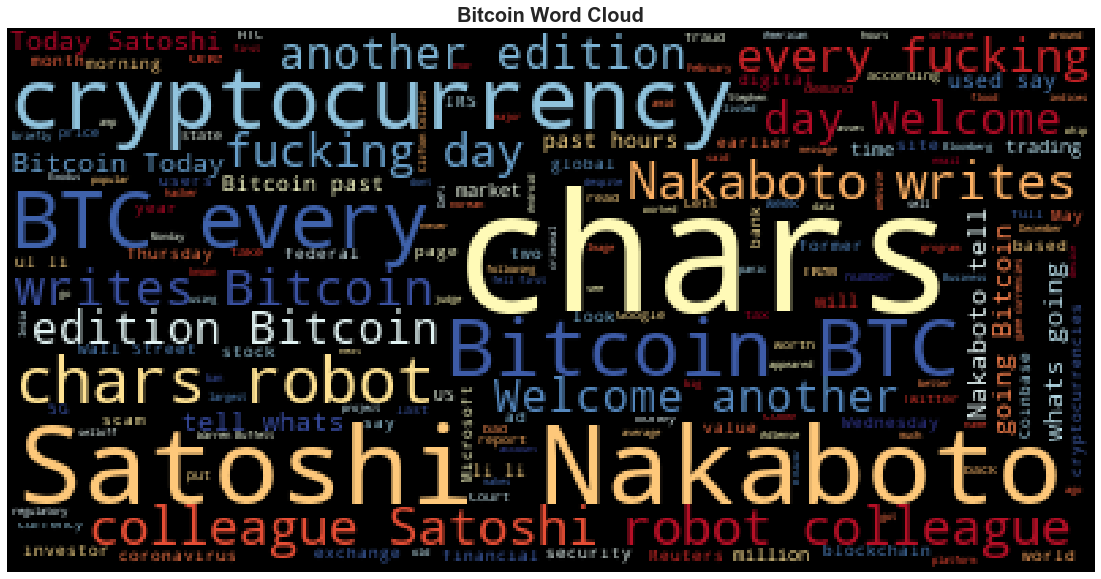

In [24]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(btc_big_string)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

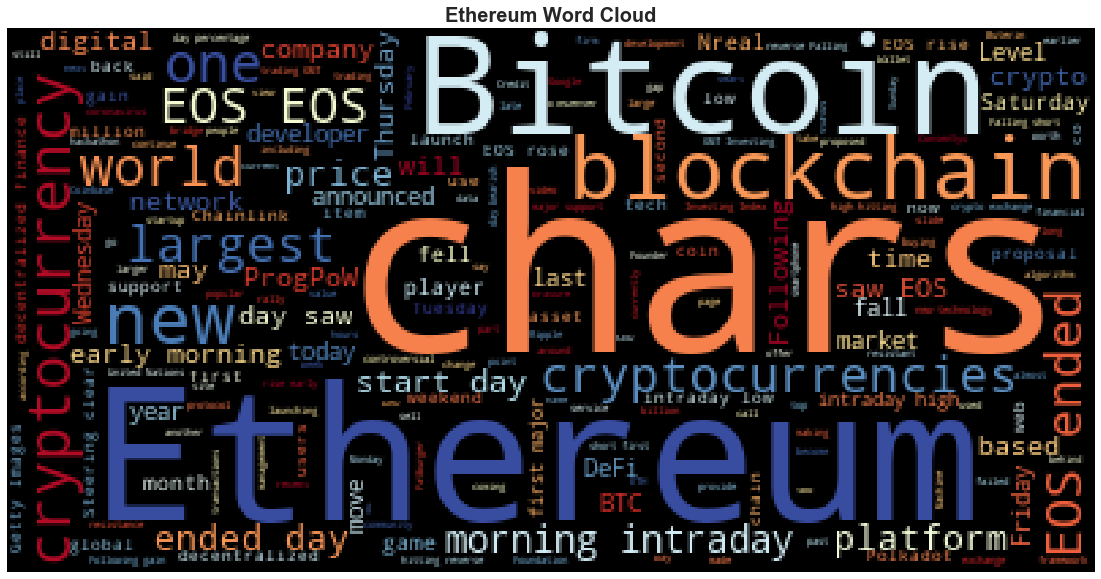

In [25]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(eth_big_string)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
bitcoin_articles = ' '.join(bitcoin_df['Text'])
bitcoin_articles

'Just when you thought the catastrophic Equifax breach was entirely in the rearview, the Department of Justice this week charged four Chinese military hackers with the theft. That\'s 147.9 million people\'s Social Security numbers and other personal information … [+4002 chars] Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars] If youve been following cryptocurrency news for the past few months, theres one word that keeps coming back DeFi, also known as decentralized finance. As the name su

In [30]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_articles)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [37]:
# List all Entities
for entities in bitcoin_ner.ents:
    print(entities.text, entities.label_)

Equifax ORG
the Department of Justice ORG
this week DATE
four CARDINAL
Chinese NORP
147.9 million CARDINAL
Social Security ORG
Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Wednesday DATE
IRS ORG
Dutch NORP
two CARDINAL
Netherlands GPE
Four CARDINAL
Bitcoin Halving ORG
May 20th 2020 DATE
third ORDINAL
50 percent PERCENT
BTC ORG
The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
R

---

## Ethereum NER

In [38]:
# Concatenate all of the bitcoin text together
ethereum_articles = ' '.join(ethereum_df['Text'])
ethereum_articles

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars] If youve been following cryptocurrency news for the past few months, theres one word that keeps coming back DeFi, also known as decentralized finance. As the name suggests, DeFi aims to bridge the gap between decentralized blockchains and financial services.\r… [+983 chars] When it comes to celebrities shilling shady initial coin offerings for money, the Securities and Exchange Commission is out for justice.\xa0\r\nActor Steven Seagal found 

In [39]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_articles)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [41]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [42]:
# List all Entities
for entities in ethereum_ner.ents:
    print(entities.text, entities.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
crypto GPE
blockchain GPE
+3338 GPE
The South Korean National Assembly ORG
today DATE
this past week DATE
2020 CARDINAL
DApps &amp ORG
DLT ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Last June DATE
Washington GPE
DC GPE
Brendan Blumer PERSON
Block.one ORG
Steve Jobs PERSON
Voice ORG
A year earlier DATE
Blumers company ORG
+3666 WORK_OF_ART
Some Libra Association ORG
Andreessen Horowitz PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘Alliance For Prosperity’ ORG
7 CARDINAL
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percen